In [51]:
%matplotlib inline

In [31]:
import os
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.cbook as cbook
from statsmodels.iolib.summary2 import summary_col
from statsmodels.iolib.table import SimpleTable

# Set directory path to current directory
dir_path = os.path.abspath('')
gdp_path = os.path.abspath('../control-variables')

dat = os.path.join(dir_path, 'results_v1.xlsx')
gdp = os.path.join(gdp_path, 'inde-variable-data.xlsx')

In [22]:
# Import GDP data into dataframe and flatten the data
gdp_df = pd.read_excel(gdp, index_col=0, sheet_name="GDP_flat")

print(gdp_df)

gdp_df.index = pd.Series(gdp_df.index).fillna(method='ffill')

# Fill the empty cells with 0s
gdp_df.fillna(0, inplace=True)


print(gdp_df)



# Sort the dataframe by country names
gdp_df = gdp_df.sort_values(["Country Name", "year"], ascending=True)




              year          GDP
Country Name                   
Angola        2002  3785.150322
NaN           2003  3838.795052
NaN           2004  4225.467927
NaN           2005  4837.709827
NaN           2006  5362.019843
...            ...          ...
NaN           2015  2679.507615
NaN           2016  2806.469032
NaN           2017  3795.642431
NaN           2018  4017.221716
NaN           2019  3783.547898

[835 rows x 2 columns]
              year          GDP
Country Name                   
Angola        2002  3785.150322
Angola        2003  3838.795052
Angola        2004  4225.467927
Angola        2005  4837.709827
Angola        2006  5362.019843
...            ...          ...
Zimbabwe      2015  2679.507615
Zimbabwe      2016  2806.469032
Zimbabwe      2017  3795.642431
Zimbabwe      2018  4017.221716
Zimbabwe      2019  3783.547898

[835 rows x 2 columns]


In [24]:
gdp_cap = pd.read_excel(gdp, index_col=0, sheet_name="GDPcapita%", usecols="A,AV:BM")

gdp_cap.index = pd.Series(gdp_cap.index).fillna(method='ffill')

# Fill the empty cells with 0s
gdp_cap.fillna(0, inplace=True)


print(gdp_cap)



# Sort the dataframe by country names
# gdp_cap = gdp_cap.sort_values(["Country Name", "year"], ascending=True)

                                 2002       2003      2004       2005  \
Country Name                                                            
Aruba                       -5.411988  -0.151921  6.023133  -0.084879   
Africa Eastern and Southern  1.337972   0.271501  2.933164   3.599817   
Afghanistan                  0.000000   3.868380 -2.875203   7.207967   
Africa Western and Central   7.010741   2.738269  5.149780   3.018704   
Angola                       9.943758  -0.431834  7.187064  11.030783   
...                               ...        ...       ...        ...   
Kosovo                       0.000000   0.000000  0.000000   0.000000   
Yemen, Rep.                  0.974937   0.789261  1.019040   2.612533   
South Africa                 2.397930   1.696808  3.289055   3.982026   
Zambia                       1.843697   4.236981  4.309003   4.471526   
Zimbabwe                    -9.125609 -17.188528 -6.102906  -6.154441   

                                 2006       2007  

In [17]:
gdp_df.isnull(True)

TypeError: isnull() takes 1 positional argument but 2 were given

In [83]:
# with pd.ExcelWriter(gdp,
#                     engine='openpyxl',
#                     mode='a',
#                     if_sheeet_exists="overlay",
# ) as writer:
#     writer.book = openpyxl.load_workbook(gdp)
#     gdp_df.to_excel(writer, sheet_name='GDP_1')

In [25]:
df = pd.read_excel(dat, index_col=0, sheet_name="standarized data")
# df.index = pd.Series(df.index).fillna(method='ffill')

In [147]:
def significance_code(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    elif p < 0.1:
        return '.'
    else:
        return ' '

In [148]:
coeffients = []

headers = ["Constant", "Energy Distribution", "Energy generation, nonrenewable", "Energy Policy", "Energy generation, renewable"]
        #    "R-squared", "Adjusted R-squared"]

countries = []

significance = []

rsq = []
rsq_adj = []

In [150]:
for name, group in df.groupby('country'):
    # print(name)
    
    # print(group['Distribution%'])
    
    y=group['elec_rate']

    # Model 1: The multiple regression model describes the response as a weighted sum of the predictors:(Elec = beta_0 + beta_1*ED + beta_2*EG,nr ~)
    X0 = group[['Distribution%',
                'Nonrenewable generation%',
                'Policy%',
                'Renewable generation%'                 
                ]]
    
    X0 = sm.add_constant(X0)
    
    reg = sm.OLS(y, X0).fit()
    
    coeffients.append(reg.params)
    # coeffients.extend([reg.params.values.flatten(), (100*reg.rsquared).astype(int), (100*reg.rsquared_adj).astype(int)])
    
    significance.append(reg.pvalues)
    
    # rsq.append(reg.rsquared)
    # rsq_adj.append(reg.rsquared_adj)
    countries.append(name)
    
    # print(rsq)
    
    # print(reg.summary())
    
    # print(res)
    # results = summary_col([reg],stars=True,float_format='%0.2f',
    #                    model_names=['Model 1'],
    #                    info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
    #                               'R2':lambda x: "{:.2f}".format(x.rsquared)})

    # print(results)

In [160]:
# print(significance)

p_df = pd.DataFrame(significance)

# Write the data into an excel sheet
with pd.ExcelWriter(dat,
                    engine='openpyxl',
                    mode='a',
                    if_sheeet_exists="overlay",
) as writer:
    writer.book = openpyxl.load_workbook(dat)
    p_df.to_excel(writer, sheet_name='pvalue')

/opt/anaconda3/envs/MyPythonProject/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  if __name__ == '__main__':


In [145]:
# Putting the coefficients into a table
tbl = SimpleTable(coeffients, headers, countries,
                  data_fmts=["%3.2f","%d"])

# Turning the table into a dataframe
tbl_df = pd.DataFrame(tbl, columns=["Country", "Constant", "Energy Distribution", "Energy generation, nonrenewable", "Energy Policy", "Energy generation, renewable"])

# Write the data into an excel sheet
with pd.ExcelWriter(dat,
                    engine='openpyxl',
                    mode='a',
                    if_sheeet_exists="overlay",
) as writer:
    writer.book = openpyxl.load_workbook(dat)
    tbl_df.to_excel(writer, sheet_name='coef')


/opt/anaconda3/envs/MyPythonProject/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Turning array with r-squared and r-sqaured adjusted values into dataframes
rsq_df = pd.DataFrame(rsq, columns=['r-squared'])
rsq_adj_df = pd.DataFrame(rsq_adj, columns=['r-squared adjusted'])

# Turning the data into columns
rsq_df = rsq_df.transpose()
rsq_adj_df = rsq_adj_df.transpose()

# Concating two data together (Got overlapped because didn't reset index)
rsq_dat = pd.concat([rsq_df, rsq_adj_df], axis=1)

# Write the data into an excel sheet
with pd.ExcelWriter(dat,
                    engine='openpyxl',
                    mode='a',
                    if_sheeet_exists="overlay",
) as writer:
    writer.book = openpyxl.load_workbook(dat)
    rsq_dat.to_excel(writer, sheet_name='rsqua')

reg operation:

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'info_criteria', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlier_test', 'params', 'predict', 'pvalues', 'remove_data', 'resid', 'resid_pearson', 'rsquared', 'rsquared_adj', 'save', 'scale', 'ssr', 'summary', 'summary2', 't_test', 't_test_pairwise', 'tvalues', 'uncentered_tss', 'use_t', 'wald_test', 'wald_test_terms', 'wresid']

In [ ]:
mydata = [[11,12],[21,22]]  # data MUST be 2-dimensional
myheaders = [ "Column 1", "Column 2" ]
mystubs = [ "Row 1", "Row 2" ]
tbl = text.SimpleTable(mydata, myheaders, mystubs, title="Title")
print( tbl )
print( tbl.as_html() )
# set column specific data formatting
tbl = text.SimpleTable(mydata, myheaders, mystubs,
    data_fmts=["%3.2f","%d"])
print( tbl.as_csv() )

In [105]:
df['country'] = pd.Categorical(df['country'], categories=df['country'].unique())

KeyError: 'country'

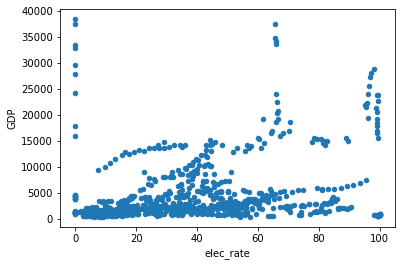

In [104]:
# for country, group in df.groupby('country'):
#     fig = group.plot.scatter(y = 'GDP', x = 'elec_rate', title=country)
    # fig.figure.savefig(dir_path + str(country))


fid = df.plot.scatter(y = 'GDP', x = 'elec_rate')

# # Draw Stripplot
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
# sns.stripplot(df.GDP, df.elec_rate, jitter=0.25, size=8, ax=ax, linewidth=.5)

# # Decorations
# plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
# plt.show()

In [52]:
# with pd.ExcelWriter(gdp,
#                     engine='openpyxl',
#                     mode='a',
#                     if_sheeet_exists="overlay",
# ) as writer:
#     writer.book = openpyxl.load_workbook(gdp)
#     gdp_df.to_excel(writer, sheet_name='GDP_flat')